In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import warnings

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
warnings.filterwarnings('ignore')

# Feature Selection
Feature selection is the process of reducing the number of input variables when developing a predictive model.It is an important step to avoid curse of dimensionality.

`To avoid overfitting, the test data must not be used in any way to make choices about the model, including feature selection. Therfore, Split to test and train and use only train data to select features and in the end, you can use transform in test data `

## 01. Dropping constant features (Variance Threshold)
In this step, we will be removing the features which have constant features which are actually not important for solving the problem statement. This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [6]:
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]})

In [7]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [8]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0) # it will remove zero variance features
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [9]:
var_thres.get_support()

array([ True,  True, False, False])

In [10]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [11]:
for feature in constant_columns:
    print(feature)

C
D


In [14]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


## 02.Feature selection with correlation (Multicollinearity)
In this step, we will be removing the features which are heighly correlated

In [16]:
from sklearn.datasets import load_boston

In [18]:
data = load_boston()
df =pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


In [20]:
X = df.drop('MEDV', axis=1)
y = df.MEDV

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000


In [22]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X,y,train_size=0.7, random_state=0)

In [23]:
X_train.shape, y_train.shape

((354, 13), (152, 13))

<AxesSubplot:>

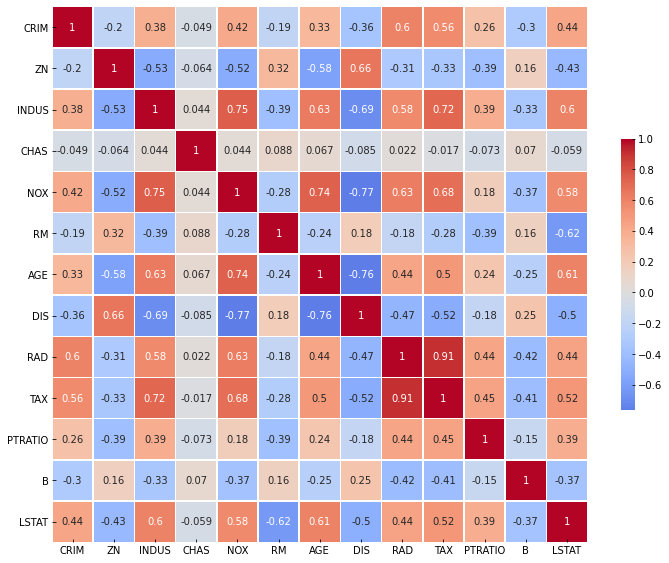

In [27]:
plt.figure(figsize=(12,10))
cr_matrix   = X_train.corr()
sns.heatmap(cr_matrix, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=plt.cm.coolwarm, annot=True)

In [28]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features =  correlation(X_train,0.7)

In [30]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [31]:
X_train.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
141,1.62864,0.00000,21.89000,0.00000,5.01900,4.00000,21.20000,396.90000,34.41000
272,0.11460,20.00000,6.96000,0.00000,6.53800,3.00000,18.60000,394.96000,7.73000
135,0.55778,0.00000,21.89000,0.00000,6.33500,4.00000,21.20000,394.67000,16.96000
298,0.06466,70.00000,2.24000,0.00000,6.34500,5.00000,14.80000,368.24000,4.97000
122,0.09299,0.00000,25.65000,0.00000,5.96100,2.00000,19.10000,378.09000,17.93000
...,...,...,...,...,...,...,...,...,...
323,0.28392,0.00000,7.38000,0.00000,5.70800,5.00000,19.60000,391.13000,11.74000
192,0.08664,45.00000,3.44000,0.00000,7.17800,5.00000,15.20000,390.49000,2.87000
117,0.15098,0.00000,10.01000,0.00000,6.02100,6.00000,17.80000,394.51000,10.30000
47,0.22927,0.00000,6.91000,0.00000,6.03000,3.00000,17.90000,392.74000,18.80000


## 03. Mutual information (information gain)

`TODO: As a requirment, the tutorial between 22 and 40 should be watched`